In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# generate data

In [2]:
# In real world, you cannot learn how the data was generated. So do not rely on this function when coding your lab.
def generate_data(dim, num):
    x = np.random.normal(0, 10, [num, dim])
    coef = np.random.uniform(-1, 1, [dim, 1])
    pred = np.dot(x, coef)
    pred_n = (pred - np.mean(pred)) / np.sqrt(np.var(pred))
    label = np.sign(pred_n)
    mislabel_value = np.random.uniform(0, 1, num)
    mislabel = 0
    for i in range(num):
        if np.abs(pred_n[i]) < 1 and mislabel_value[i] > 0.9 + 0.1 * np.abs(pred_n[i]):
            label[i] *= -1
            mislabel += 1
    return x, label, mislabel/num

In [3]:
# example
x, y, mr = generate_data(5, 100)

In [4]:
x[:5], y[:5]

(array([[  4.39192005,   9.66565871,   3.31240769,   0.34354965,
          21.18714667],
        [  4.21226416,   5.98440744, -12.54690286,   4.07529853,
           4.06032255],
        [  6.56711402,   8.24807435, -21.97036933,  -6.69375676,
         -10.03385828],
        [  5.33014751,   5.08155209,  -0.96813844,   8.81674126,
          -2.44783217],
        [-20.79992886,  -5.14951843,  11.31308323,  -5.99650972,
          13.23617651]]),
 array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.]]))

In [5]:
cnt = 0
for i in y:
    if i==1:
        cnt += 1
cnt,y.shape[0]

(53, 100)

In [6]:
n,m = x.shape
alpha1 = np.ones(n)
alpha1.shape

(100,)

# write your model class

In [7]:
# you can do anything necessary about the model
# 线性版本
class SVM1: 
    def __init__(self, dim):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.dim = dim
        self.alpha = np.zeros(dim[0])
        self.b = 0
        self.w = 0
        
        
    def kernel(self, X1, X2):
        return np.dot(X1, X2.T)  # linear SVM 
    
    def fxi(self, x_):
        """
        f(x) function
        :param X: the datasets
        :param x_: the predict data
        :return: the distance.
        """
        ans = 0
        for i in range(self.dim[0]):
            ans += self.alpha[i] * self.Y[i] * self.kernel(self.X[i], x_)
        ans += self.b
        return ans


    def fit(self, x, y):
        """
        Fit the coefficients via your methods
        """
        self.X = x
        self.Y = y
        n,m = x.shape
        a1 = [i for i in range(n)]
        a2 = [i for i in range(n)]
        random.shuffle(a2)
        
        # 最大迭代次数
        max_iter=1e3
        cnt = 0
        # C是一个超参数，惩罚参数，C越大对误分类的惩罚就越大。
        C = 10
        err = []
        init_time = time.time()
        while(1):
            
            cnt  += 1
            if cnt > max_iter:
                break
            E = 0
            for i in range(n):
                y1 = self.Y[a1[i]]
                y2 = self.Y[a2[i]]
                alpha1 = self.alpha[a1[i]]
                alpha2 = self.alpha[a2[i]]
                E1 = self.fxi(self.X[a1[i]]) - y1
                E2 = self.fxi(self.X[a2[i]]) - y2
                # print(E1)
                
                
                if y1!=y2:
                    L = max(0, alpha2 - alpha1)
                    H = min(C, C + alpha2 - alpha1)
                else:  
                    L = max(0, alpha2 + alpha1 - C)
                    H = min(C, alpha2 + alpha1)
                    
                # 计算eta
                K11 = self.kernel(self.X[a1[i]], self.X[a1[i]])
                K21 = self.kernel(self.X[a2[i]], self.X[a1[i]])
                K22 = self.kernel(self.X[a2[i]], self.X[a2[i]])
                K12 = self.kernel(self.X[a1[i]], self.X[a2[i]])
                eta = K11 + K22 - 2. * K12
                # print(eta)
                # 更新参数
                if eta>1e-6:
                    alpha2_new = alpha2 + y2 * (E1 - E2) / eta
                else:
                    eta += 1e-6
                    alpha2_new = alpha2 + y2 * (E1 - E2) / eta
                alpha2_new = np.clip(alpha2_new, L, H)
                alpha1_new = alpha1 + y1 * y2 * (alpha2 - alpha2_new)
                
                self.alpha[a1[i]] = alpha1_new
                self.alpha[a2[i]] = alpha2_new
                b1 = -E1 - y1 * K11 * (alpha1_new - alpha1) - y2 * K21 * (alpha2_new - alpha2) + self.b
                b2 = -E2 - y2 * K12 * (alpha1_new - alpha1) - y2 * K22 * (alpha2_new - alpha2) + self.b
                self.b = (b1 + b2) / 2
                E += y1 * y2 * (alpha2 - alpha2_new)

            err.append(E) 
        t = time.time() - init_time
        print(f'用时%f秒'%t)    
        return err    
            
        
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        ans = self.fxi(X)
        return np.sign(ans)

In [8]:
# you can do anything necessary about the model
# 多项式核版本
class SVM2: 
    def __init__(self, dim):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.dim = dim
        self.alpha = np.zeros(dim[0])
        self.b = 0
        self.w = 0
        
        
    def kernel(self, X1, X2):
        # m = X1.shape[0]
        K = np.dot(X1, X2.T)
        # print(K)
        # for j in range(m):
        #     K[j] = K[j]**2
        return K**(2)
    
    def fxi(self, x_):
        """
        f(x) function
        :param X: the datasets
        :param x_: the predict data
        :return: the distance.
        """
        ans = 0
        for i in range(self.dim[0]):
            ans += self.alpha[i] * self.Y[i] * self.kernel(self.X[i], x_)
        ans += self.b
        return ans


    def fit(self, x, y):
        """
        Fit the coefficients via your methods
        """
        self.X = x
        self.Y = y
        n,m = x.shape
        a1 = [i for i in range(n)]
        a2 = [i for i in range(n)]
        random.shuffle(a2)
        
        # 最大迭代次数
        max_iter=1e3
        cnt = 0
        # C是一个超参数，惩罚参数，C越大对误分类的惩罚就越大。
        C = 10
        err = []
        init_time = time.time()
        while(1):
            
            cnt  += 1
            if cnt > max_iter:
                break
            E = 0
            for i in range(n):
                y1 = self.Y[a1[i]]
                y2 = self.Y[a2[i]]
                alpha1 = self.alpha[a1[i]]
                alpha2 = self.alpha[a2[i]]
                E1 = self.fxi(self.X[a1[i]]) - y1
                E2 = self.fxi(self.X[a2[i]]) - y2
                # print(E1)
                
                
                if y1!=y2:
                    L = max(0, alpha2 - alpha1)
                    H = min(C, C + alpha2 - alpha1)
                else:  
                    L = max(0, alpha2 + alpha1 - C)
                    H = min(C, alpha2 + alpha1)
                    
                # 计算eta
                K11 = self.kernel(self.X[a1[i]], self.X[a1[i]])
                K21 = self.kernel(self.X[a2[i]], self.X[a1[i]])
                K22 = self.kernel(self.X[a2[i]], self.X[a2[i]])
                K12 = self.kernel(self.X[a1[i]], self.X[a2[i]])
                eta = K11 + K22 - 2. * K12
                # print(eta)
                # 更新参数
                if eta>1e-6:
                    alpha2_new = alpha2 + y2 * (E1 - E2) / eta
                else:
                    eta += 1e-6
                    alpha2_new = alpha2 + y2 * (E1 - E2) / eta
                alpha2_new = np.clip(alpha2_new, L, H)
                alpha1_new = alpha1 + y1 * y2 * (alpha2 - alpha2_new)
                
                self.alpha[a1[i]] = alpha1_new
                self.alpha[a2[i]] = alpha2_new
                b1 = -E1 - y1 * K11 * (alpha1_new - alpha1) - y2 * K21 * (alpha2_new - alpha2) + self.b
                b2 = -E2 - y2 * K12 * (alpha1_new - alpha1) - y2 * K22 * (alpha2_new - alpha2) + self.b
                self.b = (b1 + b2) / 2
                E += y1 * y2 * (alpha2 - alpha2_new)

            err.append(E) 
        t = time.time() - init_time
        print(f'用时%f秒'%t)    
        return err    
            
        
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        ans = self.fxi(X)
        return np.sign(ans)

# construct and train your models

In [26]:
# generate data
# X_data, y_data, mislabel = generate_data() 
data = np.concatenate((x, y), axis = 1)

# split data
def split_train_test(data, test_ratio):
    index = [i for i in range(len(data))]
    random.shuffle(index)
    num = int(test_ratio *len(data))
    train_data = data[0:num,:]
    test_data = data[num+1:len(data),:]
    return train_data, test_data
    
dim_col = data.shape[1]
train,test = split_train_test(data, 0.2)
X_train = train[:,0:dim_col-2]
y_train = train[:,dim_col-1]
X_test = test[:,0:dim_col-2]
y_test = test[:,dim_col-1]
# y_test


In [33]:
# constrcut model and train (remember record time)
dim = X_train.shape
model1 = SVM1(dim) 
loss1 = model1.fit(X_train,y_train)

model2 = SVM2(dim) 
loss2 = model2.fit(X_train,y_train)


用时1.454028秒
用时1.553001秒


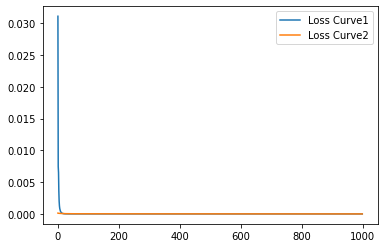

In [28]:
plt.plot(loss1,label = "Loss Curve1")
plt.plot(loss2,label = "Loss Curve2")
plt.legend()
# plt.savefig("loss.pdf")
plt.show()

# predict and compare your results

In [29]:
# make prediction
pred = model1.predict(X_test)

cnt = 0
# compared with answer
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        cnt+=1
cnt/len(pred)

0.7721518987341772

In [30]:
pred = model2.predict(X_test)

cnt = 0
# compared with answer
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        cnt+=1
cnt/len(pred)

0.620253164556962